[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SeoulTechPSE/EngNm/blob/master/ch09_animation/ch09_double_pendulum_animation.ipynb)

In [1]:
%matplotlib qt
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
from scipy import integrate
import sympy
sympy.init_printing()

## Double Pendulum

Consider the rather complicated system of two coupled second-order and nonlinear ODEs for a double
pendulum

$~$

<center><img src="https://github.com/SeoulTechPSE/EngNm/blob/master/figs/dimg270.gif?raw=1" width="300"></center> 

$$
(m_1+m_2) l_1\ddot{\theta_1} + m_2l_2\ddot{\theta_2}\cos(\theta_1-\theta_2)
+ m_2l_2\left(\dot{\theta_2}\right)^2\sin(\theta_1-\theta_2)+g(m_1+m_2)\sin(\theta_1) = 0
$$

$$
m_2l_2\ddot{\theta_2} + m_2l_1\ddot{\theta_1}\cos(\theta_1-\theta_2) - m_2l_1 \left(\dot{\theta_1}\right)^2 \sin(\theta_1-\theta_2)
+m_2g\sin(\theta_2) = 0
$$

1. We first have to write the system of two second-order ODEs as a system of four first-order ODEs on standard form. To this end, we need to introduce new functions $\text{ }y_1(t) = \theta_1(t)$, $\text{ }y_2(t) = \dot{\theta_1}(t)$, $\text{ }y_3(t) = \theta_2(t)$, $\text{ }y_4(t) = \dot{\theta_2}(t)$, $\text{ }$and rewrite the ODEs in terms of these functions.

C:\Users\whdal\anaconda3\lib\site-packages\sympy\core\relational.py:470: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


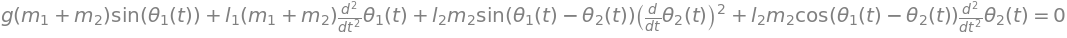

In [2]:
t, g, m1, l1, m2, l2 = sympy.symbols("t, g, m_1, l_1, m_2, l_2")
theta1, theta2 = sympy.symbols("theta_1, theta_2", cls=sympy.Function)

ode1 = sympy.Eq((m1 + m2)*l1*theta1(t).diff(t,t) +
                m2*l2*theta2(t).diff(t,t)*sympy.cos(theta1(t) -theta2(t)) +
                m2*l2*theta2(t).diff(t)**2*sympy.sin(theta1(t) - theta2(t)) + 
                g*(m1 + m2)*sympy.sin(theta1(t)))
ode1

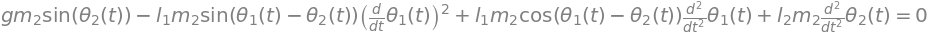

In [3]:
ode2 = sympy.Eq(m2*l2*theta2(t).diff(t,t) +
                m2*l1*theta1(t).diff(t,t)*sympy.cos(theta1(t) - theta2(t)) -
                m2*l1*theta1(t).diff(t)**2*sympy.sin(theta1(t) - theta2(t)) +
                m2*g*sympy.sin(theta2(t)))
ode2

In [4]:
y1, y2, y3, y4 = sympy.symbols("y_1, y_2, y_3, y_4", cls=sympy.Function)

varchange = {theta1(t).diff(t, t): y2(t).diff(t), 
             theta1(t): y1(t),
             theta2(t).diff(t, t): y4(t).diff(t), 
             theta2(t): y3(t)}

ode1_vc = ode1.subs(varchange)
ode2_vc = ode2.subs(varchange)
ode3 = y1(t).diff(t) - y2(t)
ode4 = y3(t).diff(t) - y4(t)

2. At this point, we have four coupled first-order ODEs for the functions $y_1$ to $y_4$. It only remains to solve for the derivatives of these functions to obtain the ODEs in standard form

In [5]:
y = sympy.Matrix([y1(t), y2(t), y3(t), y4(t)])
vcsol = sympy.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t), dict=True)
f = y.diff(t).subs(vcsol[0])

jac = sympy.Matrix([[fj.diff(yi) for yi in y] for fj in f])

In [6]:
params = {m1: 5.0, l1: 2.0, m2: 1.0, l2: 1.0, g: 10.0}

f_np = sympy.lambdify((t, y), f.subs(params), 'numpy')
jac_np = sympy.lambdify((t, y), jac.subs(params), 'numpy')

In [7]:
y0 = [2.0, 0, 0.0, 0]
t = np.linspace(0, 20, 1000)
r = integrate.ode(f_np, jac_np).set_initial_value(y0, t[0])

dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

3. When visualizing this solution, it is more intuitive to animate the positions of the pendulums in the $x–y$ plane rather than their angular deflections

In [8]:
theta1_np, theta2_np = y[:, 0], y[:, 2]

x1 =  params[l1] * np.sin(theta1_np)
y1 = -params[l1] * np.cos(theta1_np)
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)

In [9]:
fig = plt.figure(figsize=(10, 4))

ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, x1, 'r')
ax1.plot(t, y1, 'b')
ax1.set_ylabel('$x_1, y_1$', fontsize=18)
ax1.set_yticks([-3, 0, 3])
ax1.set_xlim(0, 20)
ax1.set_ylim(-3, 3)
ax1.tick_params(which='both', direction='in')

ax2.plot(t, x2, 'r')
ax2.plot(t, y2, 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2, y_2$', fontsize=18)
ax2.set_yticks([-3, 0, 3])
ax2.set_xlim(0, 20)
ax2.set_ylim(-3, 3)
ax2.tick_params(which='both', direction='in')

ax3.plot(x1, y1, 'r')
ax3.plot(x2, y2, 'b', lw=0.5)
ax3.set_xlabel('$x$', fontsize=18)
ax3.set_ylabel('$y$', fontsize=18)
ax3.set_xticks([-3, 0, 3])
ax3.set_yticks([-3, 0, 3])
ax3.set_xlim(-3, 3)
ax3.set_ylim(-3, 3)
ax3.tick_params(which='both', direction='in')

fig.tight_layout()

**Construct the animation showing the complex oscillation of a double pendulum**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation


class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        fig = plt.figure(figsize=(10, 4))
        ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
        ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
        ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

        self.t = np.linspace(0, 20, 1000)
        self.x1 =  params[l1] * np.sin(theta1_np)
        self.y1 = -params[l1] * np.cos(theta1_np)
        self.x2 = x1 + params[l2] * np.sin(theta2_np)
        self.y2 = y1 - params[l2] * np.cos(theta2_np)

        ax1.plot(t, x1, 'r')
        ax1.plot(t, y1, 'b')
        ax1.set_ylabel('$x_1, y_1$', fontsize=18)
        ax1.set_yticks([-3, 0, 3])
        self.line1 = Line2D([], [], color='black')
        self.line1a = Line2D([], [], color='red', linewidth=2)
        self.line1e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax1.add_line(self.line1)
        ax1.add_line(self.line1a)
        ax1.add_line(self.line1e)
        ax1.set_xlim(0, 20)
        ax1.set_ylim(-3, 3)
        ax1.set_aspect('equal', 'datalim')

        ax2.plot(t, x2, 'r')
        ax2.plot(t, y2, 'b')
        ax2.set_xlabel('$t$', fontsize=18)
        ax2.set_ylabel('$x_2, y_2$', fontsize=18)
        ax2.set_yticks([-3, 0, 3])
        self.line2 = Line2D([], [], color='black')
        self.line2a = Line2D([], [], color='red', linewidth=2)
        self.line2e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax2.add_line(self.line2)
        ax2.add_line(self.line2a)
        ax2.add_line(self.line2e)
        ax2.set_xlim(0, 20)
        ax2.set_ylim(-3, 3)

        ax3.plot(x1, y1, 'r')
        ax3.plot(x2, y2, 'b', lw=0.5)
        ax3.set_xlabel('$x$', fontsize=18)
        ax3.set_ylabel('$y$', fontsize=18)
        ax3.set_xticks([-3, 0, 3])
        ax3.set_yticks([-3, 0, 3])
        self.line3 = Line2D([], [], color='black')
        self.line3a = Line2D([], [], color='red', linewidth=2)
        self.line3e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax3.add_line(self.line3)
        ax3.add_line(self.line3a)
        ax3.add_line(self.line3e)
        ax3.set_xlim(-3, 3)
        ax3.set_ylim(-3, 3)

        animation.TimedAnimation.__init__(self, fig, interval=50, blit=True)

    def _draw_frame(self, framedata):
        i = framedata
        head = i - 1
        head_slice = (self.t > self.t[i] - 1.0) & (self.t < self.t[i])

        self.line1.set_data(self.t[:i], self.x1[:i])
        self.line1a.set_data(self.t[head_slice], self.x1[head_slice])
        self.line1e.set_data(self.t[head], self.x1[head])

        self.line2.set_data(self.t[:i], self.x2[:i])
        self.line2a.set_data(self.t[head_slice], self.x2[head_slice])
        self.line2e.set_data(self.t[head], self.x2[head])

        self.line3.set_data(self.x1[:i], self.y1[:i])
        self.line3a.set_data(self.x1[head_slice], self.y1[head_slice])
        self.line3e.set_data(self.x1[head], self.y1[head])

        self._drawn_artists = [self.line1, self.line1a, self.line1e,
                               self.line2, self.line2a, self.line2e,
                               self.line3, self.line3a, self.line3e]

    def new_frame_seq(self):
        return iter(range(self.t.size))

    def _init_draw(self):
        lines = [self.line1, self.line1a, self.line1e,
                 self.line2, self.line2a, self.line2e,
                 self.line3, self.line3a, self.line3e]
        for l in lines:
            l.set_data([], [])

ani = SubplotAnimation()
plt.show()